In [282]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from collections import UserDict
from IPython.display import Image
%matplotlib inline
import tensorflow as tf
from common.utils import load_data, mape, TimeSeriesTensor, create_evaluation_df
import re

pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

## import time series data

In [283]:
df = pd.read_csv('./data/ts_preprocessed.csv')
df.head()

,Date,demand,lch,holiday_Black friday,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,"holiday_Martin Luther King, Jr. Day",holiday_Memorial Day,holiday_New Year's Day,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,2016-02-01,17647,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-02-02,17185,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-02-03,21208,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-02-04,22393,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-02-05,21272,0,0,0,0,0,0,0,0,0,0,0,0


In [284]:
df_preprocessed = df.copy()

In [285]:
df_preprocessed.set_index(df_preprocessed['Date'],inplace = True)
df_preprocessed.drop(columns = ['Date'], inplace = True)
df_preprocessed.head()

,demand,lch,holiday_Black friday,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,"holiday_Martin Luther King, Jr. Day",holiday_Memorial Day,holiday_New Year's Day,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
Date,,,,,,,,,,,,,
2016-02-01,17647,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-02,17185,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-03,21208,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-04,22393,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-05,21272,0,0,0,0,0,0,0,0,0,0,0,0


In [286]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1796 entries, 2016-02-01 to 2020-12-31
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   demand                               1796 non-null   int64
 1   lch                                  1796 non-null   int64
 2   holiday_Black friday                 1796 non-null   int64
 3   holiday_Christmas Day                1796 non-null   int64
 4   holiday_Columbus Day                 1796 non-null   int64
 5   holiday_Independence Day             1796 non-null   int64
 6   holiday_Labor Day                    1796 non-null   int64
 7   holiday_Martin Luther King, Jr. Day  1796 non-null   int64
 8   holiday_Memorial Day                 1796 non-null   int64
 9   holiday_New Year's Day               1796 non-null   int64
 10  holiday_Thanksgiving                 1796 non-null   int64
 11  holiday_Veterans Day                 1796 non-

In [287]:
df_preprocessed.describe()

,demand,lch,holiday_Black friday,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,"holiday_Martin Luther King, Jr. Day",holiday_Memorial Day,holiday_New Year's Day,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
count,"1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000","1,796.00000"
mean,"10,864.66370",0.00278,0.00278,0.00278,0.00278,0.00278,0.00278,0.00223,0.00278,0.00223,0.00278,0.00278,0.00278
std,"9,409.84289",0.05270,0.05270,0.05270,0.05270,0.05270,0.05270,0.04715,0.05270,0.04715,0.05270,0.05270,0.05270
min,786.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,"5,949.25000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,"8,742.50000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,"13,285.50000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,"184,701.00000",1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


## Visualize the demand, launch, and black friday

In [288]:
# change the plot size
plt.rcParams["figure.figsize"] = (20,8)

In [289]:
df_preprocessed['lch_temp'] = df_preprocessed['lch'] * 100000
df_preprocessed['bf_temp'] = df_preprocessed['holiday_Black friday'] * 100000

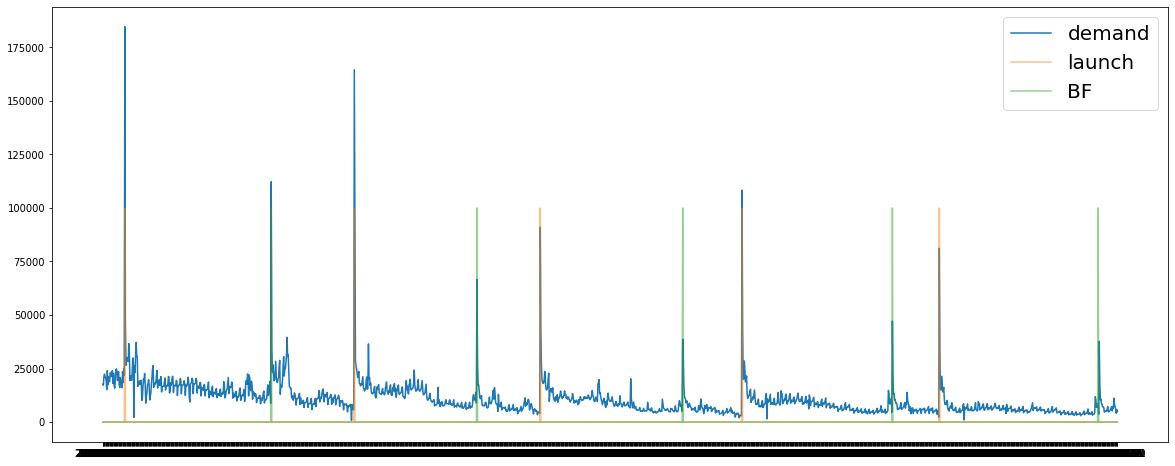

In [290]:
plt.plot(df_preprocessed['demand'], label = 'demand')
plt.plot(df_preprocessed['lch_temp'], alpha = 0.5, label = 'launch')
plt.plot(df_preprocessed['bf_temp'], alpha = 0.5, label = 'BF')
plt.legend(fontsize=20)
plt.show()

In [291]:
df_preprocessed.drop(columns = ['bf_temp', 'lch_temp'], inplace = True)

## data split

In [292]:
print("Start date: %s, end date: %s, total day count: %s days" %(min(df_preprocessed.index), max(df_preprocessed.index), df_preprocessed.index.nunique()))

Start date: 2016-02-01, end date: 2020-12-31, total day count: 1796 days


In [293]:
# setting
valid_start_dt = '2018-11-01'
test_start_dt = '2019-11-01'

T = 120 # learning period = time step
HORIZON = 90 # prediction period

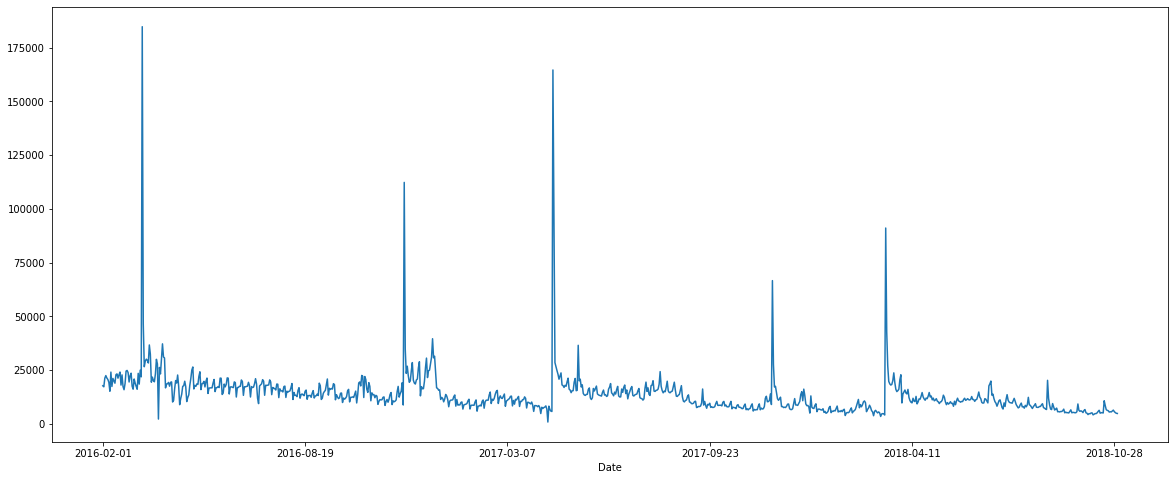

In [294]:
train = df_preprocessed.copy()[df_preprocessed.index < valid_start_dt]
train.demand.plot()

### test the custimized function called "TimeSeriesTensor"

In [295]:
test_cols = df_preprocessed.columns.tolist()
test_cols

['demand',
 'lch',
 'holiday_Black friday',
 'holiday_Christmas Day',
 'holiday_Columbus Day',
 'holiday_Independence Day',
 'holiday_Labor Day',
 'holiday_Martin Luther King, Jr. Day',
 'holiday_Memorial Day',
 "holiday_New Year's Day",
 'holiday_Thanksgiving',
 'holiday_Veterans Day',
 "holiday_Washington's Birthday"]

In [296]:
df_preprocessed.head(12)

,demand,lch,holiday_Black friday,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,"holiday_Martin Luther King, Jr. Day",holiday_Memorial Day,holiday_New Year's Day,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
Date,,,,,,,,,,,,,
2016-02-01,17647,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-02,17185,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-03,21208,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-04,22393,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-05,21272,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-06,20573,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-07,19277,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-08,15110,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-09,24016,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
# TimeSeriesTensor : custimized function
#  Horizon:5, T: 7 (= learning 7 days to predict 5 days)
test_example = TimeSeriesTensor(df_preprocessed, 'demand', 5, {'X':(range(-7+1, 1), test_cols)})
test_example.dataframe

tensor           target                                                      \
feature               y                                                       
time step           t+1          t+2          t+3          t+4          t+5   
Date                                                                          
2016-02-07 15,110.00000 24,016.00000 17,322.00000 21,068.00000 20,023.00000   
2016-02-08 24,016.00000 17,322.00000 21,068.00000 20,023.00000 18,853.00000   
2016-02-09 17,322.00000 21,068.00000 20,023.00000 18,853.00000 22,820.00000   
2016-02-10 21,068.00000 20,023.00000 18,853.00000 22,820.00000 23,191.00000   
2016-02-11 20,023.00000 18,853.00000 22,820.00000 23,191.00000 21,191.00000   
...                 ...          ...          ...          ...          ...   
2020-12-22  6,928.00000  6,535.00000 11,083.00000  8,223.00000  7,092.00000   
2020-12-23  6,535.00000 11,083.00000  8,223.00000  7,092.00000  6,339.00000   
2020-12-24 11,083.00000  8,223.00000  7,092.00000  6,339.00000  4,127.00000   
2020-12-25  8,223.00000  7,092.00000  6,339.00000  4,127.00000  5,811.00000   
2020-12-26  7,092.00000  6,339.00000  4,127.00000  5,811.00000  4,779.00000   

tensor                X                                                      \
feature          demand                                                       
time step           t-6          t-5          t-4          t-3          t-2   
Date                                                                          
2016-02-07 17,647.00000 17,185.00000 21,208.00000 22,393.00000 21,272.00000   
2016-02-08 17,185.00000 21,208.00000 22,393.00000 21,272.00000 20,573.00000   
2016-02-09 21,208.00000 22,393.00000 21,272.00000 20,573.00000 19,277.00000   
2016-02-10 22,393.00000 21,272.00000 20,573.00000 19,277.00000 15,110.00000   
2016-02-11 21,272.00000 20,573.00000 19,277.00000 15,110.00000 24,016.00000   
...                 ...          ...          ...          ...          ...   
2020-12-22  4,897.00000  5,012.00000  5,494.00000  5,777.00000  6,671.00000   
2020-12-23  5,012.00000  5,494.00000  5,777.00000  6,671.00000  7,309.00000   
2020-12-24  5,494.00000  5,777.00000  6,671.00000  7,309.00000  5,190.00000   
2020-12-25  5,777.00000  6,671.00000  7,309.00000  5,190.00000  6,928.00000   
2020-12-26  6,671.00000  7,309.00000  5,190.00000  6,928.00000  6,535.00000   

tensor                                                                  \
feature                            lch                                   
time step           t-1      t     t-6     t-5     t-4     t-3     t-2   
Date                                                                     
2016-02-07 20,573.00000  19277 0.00000 0.00000 0.00000 0.00000 0.00000   
2016-02-08 19,277.00000  15110 0.00000 0.00000 0.00000 0.00000 0.00000   
2016-02-09 15,110.00000  24016 0.00000 0.00000 0.00000 0.00000 0.00000   
2016-02-10 24,016.00000  17322 0.00000 0.00000 0.00000 0.00000 0.00000   
2016-02-11 17,322.00000  21068 0.00000 0.00000 0.00000 0.00000 0.00000   
...                 ...    ...     ...     ...     ...     ...     ...   
2020-12-22  7,309.00000   5190 0.00000 0.00000 0.00000 0.00000 0.00000   
2020-12-23  5,190.00000   6928 0.00000 0.00000 0.00000 0.00000 0.00000   
2020-12-24  6,928.00000   6535 0.00000 0.00000 0.00000 0.00000 0.00000   
2020-12-25  6,535.00000  11083 0.00000 0.00000 0.00000 0.00000 0.00000   
2020-12-26 11,083.00000   8223 0.00000 0.00000 0.00000 0.00000 0.00000   

tensor                                                                      \
feature               holiday_Black friday                                   
time step      t-1  t                  t-6     t-5     t-4     t-3     t-2   
Date                                                                         
2016-02-07 0.00000  0              0.00000 0.00000 0.00000 0.00000 0.00000   
2016-02-08 0.00000  0              0.00000 0.00000 0.00000 0.00000 0.00000   
2016-02-09 0.00000  0              0.00000 0.0000

## Start the the model training
  * dependent variable : demand

In [298]:
df_cols = df_preprocessed.columns.tolist()
df_cols

['demand',
 'lch',
 'holiday_Black friday',
 'holiday_Christmas Day',
 'holiday_Columbus Day',
 'holiday_Independence Day',
 'holiday_Labor Day',
 'holiday_Martin Luther King, Jr. Day',
 'holiday_Memorial Day',
 "holiday_New Year's Day",
 'holiday_Thanksgiving',
 'holiday_Veterans Day',
 "holiday_Washington's Birthday"]

In [299]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['demand'] = scaler.fit_transform(train[['demand']])
train.head()

,demand,lch,holiday_Black friday,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,"holiday_Martin Luther King, Jr. Day",holiday_Memorial Day,holiday_New Year's Day,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
Date,,,,,,,,,,,,,
2016-02-01,0.09168,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-02,0.08917,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-03,0.11104,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-04,0.11748,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-05,0.11139,0,0,0,0,0,0,0,0,0,0,0,0


### train set

#### transform the train to the time series format at the input of the encoder part

In [300]:
#tensor_structure = {'X':(range(-T+1, 1), df_cols)}
train_inputs = TimeSeriesTensor(train, 'demand', HORIZON, {'X':(range(-T+1, 1), df_cols)}, 'D')

In [301]:
train_inputs.dataframe

tensor      target                                                          \
feature          y                                                           
time step      t+1     t+2     t+3     t+4     t+5     t+6     t+7     t+8   
Date                                                                         
2016-05-30 0.09601 0.08896 0.09490 0.11171 0.11095 0.07088 0.08843 0.08910   
2016-05-31 0.08896 0.09490 0.11171 0.11095 0.07088 0.08843 0.08910 0.08799   
2016-06-01 0.09490 0.11171 0.11095 0.07088 0.08843 0.08910 0.08799 0.08703   
2016-06-02 0.11171 0.11095 0.07088 0.08843 0.08910 0.08799 0.08703 0.10155   
2016-06-03 0.11095 0.07088 0.08843 0.08910 0.08799 0.08703 0.10155 0.09975   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-07-29 0.03896 0.03509 0.04221 0.03851 0.04387 0.06247 0.04369 0.04210   
2018-07-30 0.03509 0.04221 0.03851 0.04387 0.06247 0.04369 0.04210 0.03802   
2018-07-31 0.04221 0.03851 0.04387 0.06247 0.04369 0.04210 0.03802 0.03418   
2018-08-01 0.03851 0.04387 0.06247 0.04369 0.04210 0.03802 0.03418 0.03907   
2018-08-02 0.04387 0.06247 0.04369 0.04210 0.03802 0.03418 0.03907 0.04225   

tensor                                                                      \
feature                                                                      
time step      t+9    t+10    t+11    t+12    t+13    t+14    t+15    t+16   
Date                                                                         
2016-05-30 0.08799 0.08703 0.10155 0.09975 0.06325 0.08721 0.08730 0.09035   
2016-05-31 0.08703 0.10155 0.09975 0.06325 0.08721 0.08730 0.09035 0.09028   
2016-06-01 0.10155 0.09975 0.06325 0.08721 0.08730 0.09035 0.09028 0.10634   
2016-06-02 0.09975 0.06325 0.08721 0.08730 0.09035 0.09028 0.10634 0.10234   
2016-06-03 0.06325 0.08721 0.08730 0.09035 0.09028 0.10634 0.10234 0.06749   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-07-29 0.03802 0.03418 0.03907 0.04225 0.04637 0.03753 0.03708 0.03717   
2018-07-30 0.03418 0.03907 0.04225 0.04637 0.03753 0.03708 0.03717 0.03939   
2018-07-31 0.03907 0.04225 0.04637 0.03753 0.03708 0.03717 0.03939 0.03933   
2018-08-01 0.04225 0.04637 0.03753 0.03708 0.03717 0.03939 0.03933 0.04351   
2018-08-02 0.04637 0.03753 0.03708 0.03717 0.03939 0.03933 0.04351 0.04633   

tensor                                                                      \
feature                                                                      
time step     t+17    t+18    t+19    t+20    t+21    t+22    t+23    t+24   
Date                                                                         
2016-05-30 0.09028 0.10634 0.10234 0.06749 0.08918 0.08911 0.09005 0.09060   
2016-05-31 0.10634 0.10234 0.06749 0.08918 0.08911 0.09005 0.09060 0.10043   
2016-06-01 0.10234 0.06749 0.08918 0.08911 0.09005 0.09060 0.10043 0.09239   
2016-06-02 0.06749 0.08918 0.08911 0.09005 0.09060 0.10043 0.09239 0.06331   
2016-06-03 0.08918 0.08911 0.09005 0.09060 0.10043 0.09239 0.06331 0.08966   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-07-29 0.03939 0.03933 0.04351 0.04633 0.03644 0.03515 0.03299 0.03168   
2018-07-30 0.03933 0.04351 0.04633 0.03644 0.03515 0.03299 0.03168 0.10550   
2018-07-31 0.04351 0.04633 0.03644 0.03515 0.03299 0.03168 0.10550 0.05989   
2018-08-01 0.04633 0.03644 0.03515 0.03299 0.03168 0.10550 0.05989 0.04328   
2018-08-02 0.03644 0.03515 0.03299 0.03168 0.10550 0.05989 0.04328 0.03300   

tensor                                                                      \
feature                                                                      
time step     t+25    t+26    t+27    t+28    t+29    t+30    t+31    t+32   
Date                                                                         
2016-05-30 0.10043 0.09239 0.06331 0.08966 0.08720 0.08825 0.09679 0.10968   
2016-05-31 0.09239 0.06331 0.08966 0.08720 0.08825 0.09679 0.10968 0.09615   
2016-06-01 0.06331 

#### transform the train to the time series format at the input of the decoder part

In [302]:
train_inputs_decoder = dict()
for i, col in enumerate(df_cols):
    if not col in ['demand']:
        train_inputs_temp = TimeSeriesTensor(train, col, HORIZON, {'X':(range(-T+1, 1), df_cols)})
        train_inputs_decoder_temp = train_inputs_temp['target']
        train_inputs_decoder[i] = train_inputs_decoder_temp[...,tf.newaxis]

In [303]:
df_cols

['demand',
 'lch',
 'holiday_Black friday',
 'holiday_Christmas Day',
 'holiday_Columbus Day',
 'holiday_Independence Day',
 'holiday_Labor Day',
 'holiday_Martin Luther King, Jr. Day',
 'holiday_Memorial Day',
 "holiday_New Year's Day",
 'holiday_Thanksgiving',
 'holiday_Veterans Day',
 "holiday_Washington's Birthday"]

In [304]:
#1: lch, 2: holiday_BF, 3. Christmas.....
train_inputs_decoder.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [305]:
train_inputs_decoder[1][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

### Validation set

#### transform the validation set to the time series format at the input of the encoder part

In [306]:
valid_start_dt

'2018-11-01'

In [307]:
look_back_dt = datetime.strptime(valid_start_dt, '%Y-%m-%d') - timedelta(days=T-1) # to datetime form
look_back_dt = datetime.strftime(look_back_dt, '%Y-%m-%d') # to string form

In [308]:
valid = df_preprocessed.copy()[(df_preprocessed.index >=look_back_dt) & (df_preprocessed.index < test_start_dt)][df_cols]
valid['demand'] = scaler.fit_transform(valid[['demand']])
valid_inputs = TimeSeriesTensor(valid, 'demand', HORIZON, {'X':(range(-T+1, 1), df_cols)})
valid_inputs.dataframe

tensor      target                                                          \
feature          y                                                           
time step      t+1     t+2     t+3     t+4     t+5     t+6     t+7     t+8   
Date                                                                         
2018-11-01 0.04609 0.04232 0.04478 0.03874 0.03553 0.03223 0.03177 0.03833   
2018-11-02 0.04232 0.04478 0.03874 0.03553 0.03223 0.03177 0.03833 0.05695   
2018-11-03 0.04478 0.03874 0.03553 0.03223 0.03177 0.03833 0.05695 0.03844   
2018-11-04 0.03874 0.03553 0.03223 0.03177 0.03833 0.05695 0.03844 0.03340   
2018-11-05 0.03553 0.03223 0.03177 0.03833 0.05695 0.03844 0.03340 0.03135   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2019-07-29 0.06634 0.07180 0.06523 0.07979 0.09143 0.04871 0.05879 0.06209   
2019-07-30 0.07180 0.06523 0.07979 0.09143 0.04871 0.05879 0.06209 0.06524   
2019-07-31 0.06523 0.07979 0.09143 0.04871 0.05879 0.06209 0.06524 0.06119   
2019-08-01 0.07979 0.09143 0.04871 0.05879 0.06209 0.06524 0.06119 0.06584   
2019-08-02 0.09143 0.04871 0.05879 0.06209 0.06524 0.06119 0.06584 0.06867   

tensor                                                                      \
feature                                                                      
time step      t+9    t+10    t+11    t+12    t+13    t+14    t+15    t+16   
Date                                                                         
2018-11-01 0.05695 0.03844 0.03340 0.03135 0.03097 0.03723 0.06282 0.07973   
2018-11-02 0.03844 0.03340 0.03135 0.03097 0.03723 0.06282 0.07973 0.07459   
2018-11-03 0.03340 0.03135 0.03097 0.03723 0.06282 0.07973 0.07459 0.05450   
2018-11-04 0.03135 0.03097 0.03723 0.06282 0.07973 0.07459 0.05450 0.05269   
2018-11-05 0.03097 0.03723 0.06282 0.07973 0.07459 0.05450 0.05269 0.05977   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2019-07-29 0.06524 0.06119 0.06584 0.06867 0.04630 0.05542 0.05145 0.05520   
2019-07-30 0.06119 0.06584 0.06867 0.04630 0.05542 0.05145 0.05520 0.05357   
2019-07-31 0.06584 0.06867 0.04630 0.05542 0.05145 0.05520 0.05357 0.06360   
2019-08-01 0.06867 0.04630 0.05542 0.05145 0.05520 0.05357 0.06360 0.06838   
2019-08-02 0.04630 0.05542 0.05145 0.05520 0.05357 0.06360 0.06838 0.04655   

tensor                                                                      \
feature                                                                      
time step     t+17    t+18    t+19    t+20    t+21    t+22    t+23    t+24   
Date                                                                         
2018-11-01 0.07459 0.05450 0.05269 0.05977 0.03325 0.34912 0.28124 0.15174   
2018-11-02 0.05450 0.05269 0.05977 0.03325 0.34912 0.28124 0.15174 0.10045   
2018-11-03 0.05269 0.05977 0.03325 0.34912 0.28124 0.15174 0.10045 0.09032   
2018-11-04 0.05977 0.03325 0.34912 0.28124 0.15174 0.10045 0.09032 0.08647   
2018-11-05 0.03325 0.34912 0.28124 0.15174 0.10045 0.09032 0.08647 0.07034   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2019-07-29 0.05357 0.06360 0.06838 0.04655 0.05181 0.05264 0.05211 0.04986   
2019-07-30 0.06360 0.06838 0.04655 0.05181 0.05264 0.05211 0.04986 0.05408   
2019-07-31 0.06838 0.04655 0.05181 0.05264 0.05211 0.04986 0.05408 0.05317   
2019-08-01 0.04655 0.05181 0.05264 0.05211 0.04986 0.05408 0.05317 0.03288   
2019-08-02 0.05181 0.05264 0.05211 0.04986 0.05408 0.05317 0.03288 0.04156   

tensor                                                                      \
feature                                                                      
time step     t+25    t+26    t+27    t+28    t+29    t+30    t+31    t+32   
Date                                                                         
2018-11-01 0.10045 0.09032 0.08647 0.07034 0.07742 0.07732 0.05024 0.05161   
2018-11-02 0.09032 0.08647 0.07034 0.07742 0.07732 0.05024 0.05161 0.06047   
2018-11-03 0.08647 

#### transform the validation set to the time series format at the input of the decoder part

In [309]:
valid_inputs_decoder = dict()
for i, col in enumerate(df_cols):
    if not col in ['demand']:
        valid_inputs_temp = TimeSeriesTensor(valid, col, HORIZON, {'X':(range(-T+1, 1), df_cols)})
        valid_inputs_decoder_temp = valid_inputs_temp['target']
        valid_inputs_decoder[i] = valid_inputs_decoder_temp[...,tf.newaxis]

In [310]:
valid_inputs_decoder.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

### Network building

In [311]:
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, RepeatVector, TimeDistributed, Flatten, concatenate
from tensorflow.keras.models import Model

In [312]:
# layer setting
ENCODER_LAYER_1_DIM = 90
ENCODER_LAYER_2_DIM = 30
DECODER_DIM = 60
BATCH_SIZE = 360
EPOCHS = 10000

In [313]:
main_input = Input(shape = (T, train.shape[-1]), name = 'main_input') #input_shape = (time step, feature)
encoder_lstm_first_out = LSTM(ENCODER_LAYER_2_DIM, return_sequences=True)(main_input)
encoder_lstm_second_out = LSTM(ENCODER_LAYER_2_DIM)(encoder_lstm_first_out)
decoder_out = RepeatVector(HORIZON)(encoder_lstm_second_out)
decoder_out2 = Dense(HORIZON)(decoder_out)

### Build auxiliary inputs network at decoder

In [314]:
# generate the aux_input1, aux_input2 ..... to  aux_input12
import sys
aux_input_var = sys.modules[__name__]
var_index = list(train_inputs_decoder.keys())
aux_input_var_list = []
for i in var_index:
    setattr(aux_input_var, "aux_input{}".format(i), Input(shape = (HORIZON, 1), name = "aux_input{}".format(i)))
    aux_input_var_list.append(getattr(aux_input_var, "aux_input{}".format(i)))
aux_input_var_list

[<tf.Tensor 'aux_input1_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input2_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input3_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input4_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input5_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input6_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input7_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input8_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input9_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input10_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input11_4:0' shape=(None, 90, 1) dtype=float32>,
 <tf.Tensor 'aux_input12_4:0' shape=(None, 90, 1) dtype=float32>]

In [315]:
concat_decoder_out_aux_input = concatenate([decoder_out2] + aux_input_var_list)

### Identical way to build auxiliary inputs

In [316]:
if False:
    aux_input1 = Input(shape=(HORIZON, 1), name = 'aux_input1')
    aux_input2 = Input(shape=(HORIZON, 1), name = 'aux_input2')
    aux_input3 = Input(shape=(HORIZON, 1), name = 'aux_input3')
    aux_input4 = Input(shape=(HORIZON, 1), name = 'aux_input4')
    aux_input5 = Input(shape=(HORIZON, 1), name = 'aux_input5')
    aux_input6 = Input(shape=(HORIZON, 1), name = 'aux_input6')
    aux_input7 = Input(shape=(HORIZON, 1), name = 'aux_input7')
    aux_input8 = Input(shape=(HORIZON, 1), name = 'aux_input8')
    aux_input9 = Input(shape=(HORIZON, 1), name = 'aux_input9')
    aux_input10 = Input(shape=(HORIZON, 1), name = 'aux_input10')
    aux_input11 = Input(shape=(HORIZON, 1), name = 'aux_input11')
    aux_input12 = Input(shape=(HORIZON, 1), name = 'aux_input12')

    concat_decoder_out_aux_input = concatenate([decoder_out2, 
                                                aux_input1, 
                                                aux_input2, 
                                                aux_input3, 
                                                aux_input4, 
                                                aux_input5, 
                                                aux_input6,
                                                aux_input7, 
                                                aux_input8, 
                                                aux_input9, 
                                                aux_input10, 
                                                aux_input11, 
                                                aux_input12])

In [317]:
decoder_lstm_out = LSTM(DECODER_DIM, return_sequences=True)(concat_decoder_out_aux_input)
time_based_out = TimeDistributed(Dense(1))(decoder_lstm_out)
flatten_out = Flatten()(time_based_out)
model = Model(inputs = [main_input] + aux_input_var_list, outputs = [flatten_out])

In [318]:
from tensorflow.keras import metrics

In [319]:
model.compile(optimizer='RMSprop', loss='mse', metrics =['acc'])

In [320]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 120, 13)]    0                                            
__________________________________________________________________________________________________
lstm_12 (LSTM)                  (None, 120, 30)      5280        main_input[0][0]                 
__________________________________________________________________________________________________
lstm_13 (LSTM)                  (None, 30)           7320        lstm_12[0][0]                    
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 90, 30)       0           lstm_13[0][0]                    
____________________________________________________________________________________________

In [321]:
valid_inputs['X'].shape

(275, 120, 13)

In [322]:
list(valid_inputs_decoder.values())[2].shape

(275, 90, 1)

### EalyStopping option
    monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
    min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
    patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
    verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
    mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
    auto : 관찰하는 이름에 따라 자동으로 지정합니다.
    min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
    max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.

In [323]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min', min_delta = 0, patience = 20)
history = model.fit([train_inputs['X']] + list(train_inputs_decoder.values()),train_inputs['target'],
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              validation_data = ([valid_inputs['X']] + list(valid_inputs_decoder.values()), valid_inputs['target']),
              callbacks=[earlystop])

Train on 795 samples, validate on 275 samples
Epoch 1/10000
795/795 [==============================] - 5s 6ms/sample - loss: 0.0059 - acc: 0.2478 - val_loss: 0.0053 - val_acc: 0.1200
Epoch 2/10000
795/795 [==============================] - 0s 107us/sample - loss: 0.0026 - acc: 0.2503 - val_loss: 0.0049 - val_acc: 0.1200
Epoch 3/10000
795/795 [==============================] - 0s 107us/sample - loss: 0.0025 - acc: 0.2604 - val_loss: 0.0048 - val_acc: 0.3600
Epoch 4/10000
795/795 [==============================] - 0s 103us/sample - loss: 0.0024 - acc: 0.3824 - val_loss: 0.0046 - val_acc: 0.3636
Epoch 5/10000
795/795 [==============================] - 0s 103us/sample - loss: 0.0023 - acc: 0.3836 - val_loss: 0.0046 - val_acc: 0.3636
Epoch 6/10000
795/795 [==============================] - 0s 99us/sample - loss: 0.0023 - acc: 0.4226 - val_loss: 0.0044 - val_acc: 0.3891
Epoch 7/10000
795/795 [==============================] - 0s 94us/sample - loss: 0.0023 - acc: 0.4654 - val_loss: 0.0048 - v

795/795 [==============================] - 0s 94us/sample - loss: 8.0200e-04 - acc: 0.4830 - val_loss: 0.0013 - val_acc: 0.4691
Epoch 60/10000
795/795 [==============================] - 0s 96us/sample - loss: 7.4748e-04 - acc: 0.4855 - val_loss: 0.0015 - val_acc: 0.4545
Epoch 61/10000
795/795 [==============================] - 0s 94us/sample - loss: 6.8268e-04 - acc: 0.4830 - val_loss: 0.0013 - val_acc: 0.4691
Epoch 62/10000
795/795 [==============================] - 0s 96us/sample - loss: 5.7745e-04 - acc: 0.4893 - val_loss: 0.0013 - val_acc: 0.4618
Epoch 63/10000
795/795 [==============================] - 0s 94us/sample - loss: 5.6694e-04 - acc: 0.4906 - val_loss: 0.0020 - val_acc: 0.4618
Epoch 64/10000
795/795 [==============================] - 0s 96us/sample - loss: 0.0010 - acc: 0.4868 - val_loss: 0.0014 - val_acc: 0.4655
Epoch 65/10000
795/795 [==============================] - 0s 93us/sample - loss: 7.0654e-04 - acc: 0.4906 - val_loss: 0.0012 - val_acc: 0.4618
Epoch 66/10000
795

### Identical way to build auxiliary inputs

In [324]:
if False:
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20)
    ([train_inputs['X']] + list(train_inputs_decoder.values()))
    history = model.fit([train_inputs['X'], 
                     train_inputs_decoder[1], 
                     train_inputs_decoder[2], 
                     train_inputs_decoder[3], 
                     train_inputs_decoder[4], 
                     train_inputs_decoder[5], 
                     train_inputs_decoder[6], 
                     train_inputs_decoder[7], 
                     train_inputs_decoder[8], 
                     train_inputs_decoder[9], 
                     train_inputs_decoder[10], 
                     train_inputs_decoder[11], 
                     train_inputs_decoder[12]],train_inputs['target'],
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=([valid_inputs['X'], 
                     valid_inputs_decoder[1], 
                     valid_inputs_decoder[2], 
                     valid_inputs_decoder[3], 
                     valid_inputs_decoder[4], 
                     valid_inputs_decoder[5], 
                     valid_inputs_decoder[6], 
                     valid_inputs_decoder[7], 
                     valid_inputs_decoder[8], 
                     valid_inputs_decoder[9], 
                     valid_inputs_decoder[10], 
                     valid_inputs_decoder[11], 
                     valid_inputs_decoder[12]], valid_inputs['target']),
              callbacks=[earlystop])

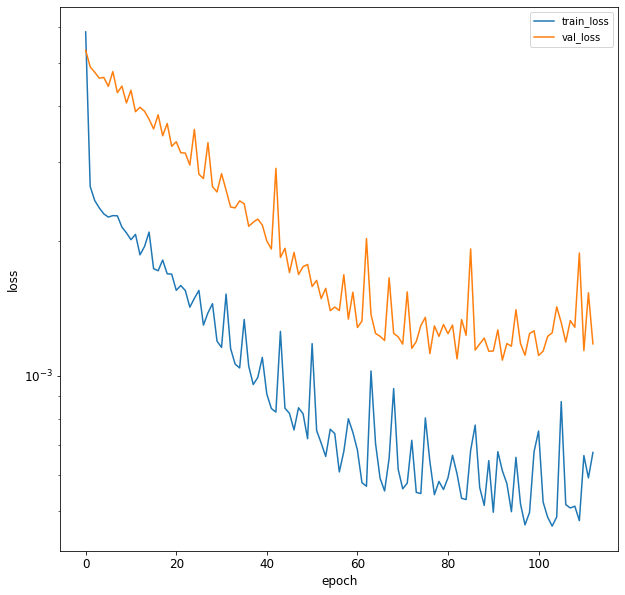

In [325]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

## Predict 60 days in the future

In [326]:
test_start_dt

'2019-11-01'

In [327]:
look_back_dt = datetime.strptime(test_start_dt, '%Y-%m-%d') - timedelta(days=T-1) # to datetime form
look_back_dt = datetime.strftime(look_back_dt, '%Y-%m-%d') # to string form
look_back_dt

'2019-07-05'

In [328]:
test = df_preprocessed.copy()[df_preprocessed.index >=look_back_dt][df_cols]
test['demand'] = scaler.transform(test[['demand']])
test_inputs = TimeSeriesTensor(test, 'demand', HORIZON, {'X':(range(-T+1, 1), df_cols)})

In [329]:
test_inputs.dataframe.head()

tensor      target                                                          \
feature          y                                                           
time step      t+1     t+2     t+3     t+4     t+5     t+6     t+7     t+8   
Date                                                                         
2019-11-01 0.04632 0.02586 0.03194 0.03504 0.03384 0.03418 0.04476 0.05770   
2019-11-02 0.02586 0.03194 0.03504 0.03384 0.03418 0.04476 0.05770 0.02844   
2019-11-03 0.03194 0.03504 0.03384 0.03418 0.04476 0.05770 0.02844 0.03851   
2019-11-04 0.03504 0.03384 0.03418 0.04476 0.05770 0.02844 0.03851 0.03226   
2019-11-05 0.03384 0.03418 0.04476 0.05770 0.02844 0.03851 0.03226 0.02974   

tensor                                                                      \
feature                                                                      
time step      t+9    t+10    t+11    t+12    t+13    t+14    t+15    t+16   
Date                                                                         
2019-11-01 0.02844 0.03851 0.03226 0.02974 0.02899 0.03822 0.04248 0.02354   
2019-11-02 0.03851 0.03226 0.02974 0.02899 0.03822 0.04248 0.02354 0.02967   
2019-11-03 0.03226 0.02974 0.02899 0.03822 0.04248 0.02354 0.02967 0.02870   
2019-11-04 0.02974 0.02899 0.03822 0.04248 0.02354 0.02967 0.02870 0.03004   
2019-11-05 0.02899 0.03822 0.04248 0.02354 0.02967 0.02870 0.03004 0.03743   

tensor                                                                      \
feature                                                                      
time step     t+17    t+18    t+19    t+20    t+21    t+22    t+23    t+24   
Date                                                                         
2019-11-01 0.02967 0.02870 0.03004 0.03743 0.12473 0.10785 0.06595 0.06697   
2019-11-02 0.02870 0.03004 0.03743 0.12473 0.10785 0.06595 0.06697 0.06649   
2019-11-03 0.03004 0.03743 0.12473 0.10785 0.06595 0.06697 0.06649 0.08905   
2019-11-04 0.03743 0.12473 0.10785 0.06595 0.06697 0.06649 0.08905 0.02898   
2019-11-05 0.12473 0.10785 0.06595 0.06697 0.06649 0.08905 0.02898 0.42757   

tensor                                                                      \
feature                                                                      
time step     t+25    t+26    t+27    t+28    t+29    t+30    t+31    t+32   
Date                                                                         
2019-11-01 0.06649 0.08905 0.02898 0.42757 0.18702 0.10713 0.11055 0.08308   
2019-11-02 0.08905 0.02898 0.42757 0.18702 0.10713 0.11055 0.08308 0.08373   
2019-11-03 0.02898 0.42757 0.18702 0.10713 0.11055 0.08308 0.08373 0.06924   
2019-11-04 0.42757 0.18702 0.10713 0.11055 0.08308 0.08373 0.06924 0.06929   
2019-11-05 0.18702 0.10713 0.11055 0.08308 0.08373 0.06924 0.06929 0.06509   

tensor                                                                      \
feature                                                                      
time step     t+33    t+34    t+35    t+36    t+37    t+38    t+39    t+40   
Date                                                                         
2019-11-01 0.08373 0.06924 0.06929 0.06509 0.04030 0.04647 0.04392 0.04609   
2019-11-02 0.06924 0.06929 0.06509 0.04030 0.04647 0.04392 0.04609 0.04553   
2019-11-03 0.06929 0.06509 0.04030 0.04647 0.04392 0.04609 0.04553 0.05471   
2019-11-04 0.06509 0.04030 0.04647 0.04392 0.04609 0.04553 0.05471 0.07092   
2019-11-05 0.04030 0.04647 0.04392 0.04609 0.04553 0.05471 0.07092 0.04188   

tensor                                                                      \
feature                                                                      
time step     t+41    t+42    t+43    t+44    t+45    t+46    t+47    t+48   
Date                                                                         
2019-11-01 0.04553 0.05471 0.07092 0.04188 0.04355 0.04490 0.05054 0.05385   
2019-11-02 0.05471 0.07092 0.04188 0.04355 0.04490 0.05054 0.05385 0.06432   
2019-11-03 0.0709

In [330]:
test_inputs_decoder = dict()
for i, col in enumerate(df_cols):
    if not col in ['demand']:
        test_inputs_temp = TimeSeriesTensor(test, col, HORIZON, {'X':(range(-T+1, 1), df_cols)})
        test_inputs_decoder_temp = test_inputs_temp['target']
        test_inputs_decoder[i] = test_inputs_decoder_temp[...,tf.newaxis]

In [331]:
predictions = model.predict([test_inputs['X']] + list(test_inputs_decoder.values()))
predictions

array([[0.03, 0.03, 0.03, ..., 0.03, 0.03, 0.03],
       [0.03, 0.03, 0.03, ..., 0.03, 0.03, 0.03],
       [0.03, 0.03, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.03, 0.03, 0.03, ..., 0.06, 0.05, 0.04],
       [0.03, 0.03, 0.03, ..., 0.05, 0.04, 0.04],
       [0.03, 0.03, 0.03, ..., 0.04, 0.04, 0.04]], dtype=float32)

### Identical way to build auxiliary inputs

In [332]:
if False:
    predictions = model.predict([test_inputs['X'], 
                         test_inputs_decoder[1], 
                         test_inputs_decoder[2], 
                         test_inputs_decoder[3], 
                         test_inputs_decoder[4], 
                         test_inputs_decoder[5], 
                         test_inputs_decoder[6], 
                         test_inputs_decoder[7], 
                         test_inputs_decoder[8], 
                         test_inputs_decoder[9], 
                         test_inputs_decoder[10], 
                         test_inputs_decoder[11], 
                         test_inputs_decoder[12]])

In [333]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['plan_dt'] = test_inputs.dataframe.index
eval_df

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12,t+13,t+14,t+15,t+16,t+17,t+18,t+19,t+20,t+21,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29,t+30,t+31,t+32,t+33,t+34,t+35,t+36,t+37,t+38,t+39,t+40,t+41,t+42,t+43,t+44,t+45,t+46,t+47,t+48,t+49,t+50,t+51,t+52,t+53,t+54,t+55,t+56,t+57,t+58,t+59,t+60,t+61,t+62,t+63,t+64,t+65,t+66,t+67,t+68,t+69,t+70,t+71,t+72,t+73,t+74,t+75,t+76,t+77,t+78,t+79,t+80,t+81,t+82,t+83,t+84,t+85,t+86,t+87,t+88,t+89,t+90,plan_dt
0,0.02581,0.02831,0.02906,0.02938,0.02967,0.03001,0.03035,0.03068,0.03098,0.03904,0.02529,0.02236,0.02476,0.02851,0.03203,0.03485,0.03695,0.03848,0.03962,0.04049,0.04121,0.04184,0.04240,0.04293,0.04342,0.04388,0.03090,0.43546,0.14541,0.09168,0.07795,0.07480,0.07263,0.06920,0.06476,0.06014,0.05605,0.05290,0.05083,0.04981,0.04968,0.05025,0.05132,0.05272,0.05428,0.05587,0.05741,0.05880,0.06001,0.06100,0.06174,0.06224,0.06249,0.09467,0.07364,0.05621,0.04794,0.04427,0.04277,0.04222,0.05337,0.03890,0.03697,0.03564,0.03505,0.03497,0.03510,0.03523,0.03524,0.03509,0.03478,0.03435,0.03384,0.03329,0.03274,0.03223,0.03177,0.03140,0.03111,0.02500,0.02217,0.02432,0.02585,0.02710,0.02813,0.02894,0.02948,0.02979,0.02988,0.02981,2019-11-01
1,0.02637,0.02908,0.02987,0.03018,0.03044,0.03075,0.03108,0.03140,0.03965,0.02575,0.02281,0.02521,0.02894,0.03245,0.03524,0.03731,0.03881,0.03992,0.04077,0.04147,0.04208,0.04264,0.04316,0.04365,0.04411,0.03099,0.43622,0.14566,0.09186,0.07817,0.07505,0.07292,0.06952,0.06510,0.06050,0.05643,0.05330,0.05126,0.05026,0.05015,0.05075,0.05184,0.05326,0.05485,0.05646,0.05801,0.05943,0.06065,0.06164,0.06240,0.06290,0.06316,0.09554,0.07434,0.05688,0.04858,0.04490,0.04340,0.04284,0.05399,0.03950,0.03757,0.03623,0.03563,0.03553,0.03565,0.03577,0.03576,0.03560,0.03528,0.03484,0.03432,0.03376,0.03320,0.03268,0.03221,0.03183,0.03154,0.02554,0.02260,0.02476,0.02628,0.02753,0.02857,0.02937,0.02992,0.03022,0.03031,0.03024,0.03006,2019-11-02
2,0.02676,0.02961,0.03044,0.03074,0.03098,0.03127,0.03159,0.04002,0.02597,0.02303,0.02544,0.02918,0.03267,0.03544,0.03749,0.03896,0.04004,0.04086,0.04154,0.04213,0.04268,0.04320,0.04369,0.04415,0.03092,0.43664,0.14571,0.09188,0.07821,0.07512,0.07302,0.06964,0.06524,0.06067,0.05662,0.05352,0.05150,0.05052,0.05043,0.05105,0.05217,0.05361,0.05521,0.05685,0.05841,0.05984,0.06107,0.06208,0.06284,0.06335,0.06361,0.09614,0.07482,0.05733,0.04903,0.04534,0.04383,0.04327,0.05442,0.03992,0.03799,0.03664,0.03603,0.03592,0.03603,0.03614,0.03613,0.03595,0.03562,0.03517,0.03464,0.03407,0.03351,0.03298,0.03251,0.03213,0.03183,0.02591,0.02289,0.02505,0.02658,0.02783,0.02887,0.02967,0.03021,0.03052,0.03061,0.03054,0.03035,0.03010,2019-11-03
3,0.02710,0.03007,0.03093,0.03123,0.03145,0.03173,0.04031,0.02611,0.02318,0.02561,0.02936,0.03285,0.03560,0.03763,0.03907,0.04012,0.04091,0.04157,0.04214,0.04267,0.04317,0.04366,0.04412,0.03080,0.43697,0.14568,0.09182,0.07817,0.07512,0.07304,0.06969,0.06531,0.06076,0.05674,0.05365,0.05166,0.05070,0.05064,0.05128,0.05242,0.05388,0.05550,0.05716,0.05874,0.06018,0.06143,0.06245,0.06322,0.06373,0.06400,0.09666,0.07524,0.05772,0.04941,0.04572,0.04421,0.04364,0.05478,0.04027,0.03834,0.03699,0.03637,0.03626,0.03636,0.03646,0.03643,0.03625,0.03592,0.03546,0.03492,0.03434,0.03377,0.03324,0.03277,0.03238,0.03208,0.02622,0.02314,0.02530,0.02683,0.02808,0.02912,0.02992,0.03046,0.03076,0.03086,0.03078,0.03060,0.03035,0.03008,2019-11-04
4,0.02743,0.03053,0.03142,0.03171,0.03192,0.04062,0.02622,0.02329,0.02575,0.02953,0.03303,0.03578,0.03778,0.03920,0.04022,0.04098,0.04161,0.04215,0.04266,0.04315,0.04363,0.04408,0.03066,0.43730,0.14562,0.09174,0.07812,0.07509,0.07304,0.06971,0.06535,0.06082,0.05682,0.05376,0.05179,0.05086,0.05082,0.05148,0.05265,0.05413,0.05577,0.05745,0.05905,0.06050,0.06176,0.06279,0.06357,0.06410,0.06437,0.09716,0.07563,0.05810,0.04978,0.04609,0.04457,0.04400,0.05514,0.04062,0.03869,0.03733,0.03671,0.03658,0.03667,0.03676,0.03673,0.03654,0.03620,0.03573,0.03519,0.03461,0.03403,0.03349,0.03301,0.03262,0.03232,0.02652,0.02338,

In [334]:
eval_df = pd.melt(eval_df, id_vars='plan_dt', value_name='prediction', var_name='pred_window')
eval_df

,plan_dt,pred_window,prediction
0,2019-11-01,t+1,0.02581
1,2019-11-02,t+1,0.02637
2,2019-11-03,t+1,0.02676
3,2019-11-04,t+1,0.02710
4,2019-11-05,t+1,0.02743
...,...,...,...
30325,2020-09-28,t+90,0.05569
30326,2020-09-29,t+90,0.04711
30327,2020-09-30,t+90,0.04316
30328,2020-10-01,t+90,0.04135


In [335]:
actual_df = pd.DataFrame(test_inputs['target'], columns=['t+'+str(t) for t in range(1, HORIZON+1)])
actual_df['plan_dt'] = test_inputs.dataframe.index
actual_df

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12,t+13,t+14,t+15,t+16,t+17,t+18,t+19,t+20,t+21,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29,t+30,t+31,t+32,t+33,t+34,t+35,t+36,t+37,t+38,t+39,t+40,t+41,t+42,t+43,t+44,t+45,t+46,t+47,t+48,t+49,t+50,t+51,t+52,t+53,t+54,t+55,t+56,t+57,t+58,t+59,t+60,t+61,t+62,t+63,t+64,t+65,t+66,t+67,t+68,t+69,t+70,t+71,t+72,t+73,t+74,t+75,t+76,t+77,t+78,t+79,t+80,t+81,t+82,t+83,t+84,t+85,t+86,t+87,t+88,t+89,t+90,plan_dt
0,0.04632,0.02586,0.03194,0.03504,0.03384,0.03418,0.04476,0.05770,0.02844,0.03851,0.03226,0.02974,0.02899,0.03822,0.04248,0.02354,0.02967,0.02870,0.03004,0.03743,0.12473,0.10785,0.06595,0.06697,0.06649,0.08905,0.02898,0.42757,0.18702,0.10713,0.11055,0.08308,0.08373,0.06924,0.06929,0.06509,0.04030,0.04647,0.04392,0.04609,0.04553,0.05471,0.07092,0.04188,0.04355,0.04490,0.05054,0.05385,0.06432,0.07178,0.04698,0.06732,0.06273,0.11595,0.08248,0.06924,0.06043,0.03455,0.05425,0.04218,0.02234,0.04468,0.04874,0.04692,0.02428,0.03945,0.03559,0.03722,0.03566,0.04207,0.03933,0.02449,0.03237,0.03633,0.03801,0.04018,0.04604,0.04264,0.02432,0.03927,0.04195,0.04333,0.03938,0.04475,0.04664,0.02609,0.03300,0.03729,0.03884,0.03959,2019-11-01
1,0.02586,0.03194,0.03504,0.03384,0.03418,0.04476,0.05770,0.02844,0.03851,0.03226,0.02974,0.02899,0.03822,0.04248,0.02354,0.02967,0.02870,0.03004,0.03743,0.12473,0.10785,0.06595,0.06697,0.06649,0.08905,0.02898,0.42757,0.18702,0.10713,0.11055,0.08308,0.08373,0.06924,0.06929,0.06509,0.04030,0.04647,0.04392,0.04609,0.04553,0.05471,0.07092,0.04188,0.04355,0.04490,0.05054,0.05385,0.06432,0.07178,0.04698,0.06732,0.06273,0.11595,0.08248,0.06924,0.06043,0.03455,0.05425,0.04218,0.02234,0.04468,0.04874,0.04692,0.02428,0.03945,0.03559,0.03722,0.03566,0.04207,0.03933,0.02449,0.03237,0.03633,0.03801,0.04018,0.04604,0.04264,0.02432,0.03927,0.04195,0.04333,0.03938,0.04475,0.04664,0.02609,0.03300,0.03729,0.03884,0.03959,0.04826,2019-11-02
2,0.03194,0.03504,0.03384,0.03418,0.04476,0.05770,0.02844,0.03851,0.03226,0.02974,0.02899,0.03822,0.04248,0.02354,0.02967,0.02870,0.03004,0.03743,0.12473,0.10785,0.06595,0.06697,0.06649,0.08905,0.02898,0.42757,0.18702,0.10713,0.11055,0.08308,0.08373,0.06924,0.06929,0.06509,0.04030,0.04647,0.04392,0.04609,0.04553,0.05471,0.07092,0.04188,0.04355,0.04490,0.05054,0.05385,0.06432,0.07178,0.04698,0.06732,0.06273,0.11595,0.08248,0.06924,0.06043,0.03455,0.05425,0.04218,0.02234,0.04468,0.04874,0.04692,0.02428,0.03945,0.03559,0.03722,0.03566,0.04207,0.03933,0.02449,0.03237,0.03633,0.03801,0.04018,0.04604,0.04264,0.02432,0.03927,0.04195,0.04333,0.03938,0.04475,0.04664,0.02609,0.03300,0.03729,0.03884,0.03959,0.04826,0.05418,2019-11-03
3,0.03504,0.03384,0.03418,0.04476,0.05770,0.02844,0.03851,0.03226,0.02974,0.02899,0.03822,0.04248,0.02354,0.02967,0.02870,0.03004,0.03743,0.12473,0.10785,0.06595,0.06697,0.06649,0.08905,0.02898,0.42757,0.18702,0.10713,0.11055,0.08308,0.08373,0.06924,0.06929,0.06509,0.04030,0.04647,0.04392,0.04609,0.04553,0.05471,0.07092,0.04188,0.04355,0.04490,0.05054,0.05385,0.06432,0.07178,0.04698,0.06732,0.06273,0.11595,0.08248,0.06924,0.06043,0.03455,0.05425,0.04218,0.02234,0.04468,0.04874,0.04692,0.02428,0.03945,0.03559,0.03722,0.03566,0.04207,0.03933,0.02449,0.03237,0.03633,0.03801,0.04018,0.04604,0.04264,0.02432,0.03927,0.04195,0.04333,0.03938,0.04475,0.04664,0.02609,0.03300,0.03729,0.03884,0.03959,0.04826,0.05418,0.02365,2019-11-04
4,0.03384,0.03418,0.04476,0.05770,0.02844,0.03851,0.03226,0.02974,0.02899,0.03822,0.04248,0.02354,0.02967,0.02870,0.03004,0.03743,0.12473,0.10785,0.06595,0.06697,0.06649,0.08905,0.02898,0.42757,0.18702,0.10713,0.11055,0.08308,0.08373,0.06924,0.06929,0.06509,0.04030,0.04647,0.04392,0.04609,0.04553,0.05471,0.07092,0.04188,0.04355,0.04490,0.05054,0.05385,0.06432,0.07178,0.04698,0.06732,0.06273,0.11595,0.08248,0.06924,0.06043,0.03455,0.05425,0.04218,0.02234,0.04468,0.04874,0.04692,0.02428,0.03945,0.03559,0.03722,0.03566,0.04207,0.03933,0.02449,0.03237,0.03633,0.03801,0.04018,0.04604,0.04264,0.02432,0.03927,0.04195,

In [336]:
actual_df = pd.melt(actual_df, id_vars='plan_dt', value_name='actual', var_name='pred_window')
actual_df

,plan_dt,pred_window,actual
0,2019-11-01,t+1,0.04632
1,2019-11-02,t+1,0.02586
2,2019-11-03,t+1,0.03194
3,2019-11-04,t+1,0.03504
4,2019-11-05,t+1,0.03384
...,...,...,...
30325,2020-09-28,t+90,0.05264
30326,2020-09-29,t+90,0.04559
30327,2020-09-30,t+90,0.02488
30328,2020-10-01,t+90,0.04065


In [337]:
eval_df['actual'] = np.transpose(test_inputs['target']).ravel()
eval_df.head(50)

,plan_dt,pred_window,prediction,actual
0,2019-11-01,t+1,0.02581,0.04632
1,2019-11-02,t+1,0.02637,0.02586
2,2019-11-03,t+1,0.02676,0.03194
3,2019-11-04,t+1,0.02710,0.03504
4,2019-11-05,t+1,0.02743,0.03384
5,2019-11-06,t+1,0.02773,0.03418
6,2019-11-07,t+1,0.02800,0.04476
7,2019-11-08,t+1,0.02838,0.05770
8,2019-11-09,t+1,0.02897,0.02844
9,2019-11-10,t+1,0.03881,0.03851


In [338]:
eval_df[['prediction']] = scaler.inverse_transform(eval_df[['prediction']]).astype('int')
eval_df[['actual']] = scaler.inverse_transform(eval_df[['actual']]).astype('int')

In [339]:
eval_df['date_delta'] = [int(i.split('+')[1]) for i in eval_df['pred_window']]
eval_df['plan_dt'] = [datetime.strptime(i, '%Y-%m-%d') for i in eval_df['plan_dt']]
#target date = plad_dt + date_delta
eval_df['t_year_dt'] = [ p + timedelta(d) for p, d in zip(eval_df['plan_dt'], eval_df['date_delta'])]
#accuracy
eval_df['accuracy'] = 1- (eval_df['prediction'] - eval_df['actual']).abs() / eval_df['actual']
eval_df_final = eval_df.copy()
eval_df_final = eval_df_final[['plan_dt', 't_year_dt', 'pred_window', 'prediction', 'actual', 'accuracy']]
eval_df_final

,plan_dt,t_year_dt,pred_window,prediction,actual,accuracy
0,2019-11-01,2019-11-02,t+1,4225,6417,0.65841
1,2019-11-02,2019-11-03,t+1,4285,4231,0.98724
2,2019-11-03,2019-11-04,t+1,4327,4881,0.88650
3,2019-11-04,2019-11-05,t+1,4363,5211,0.83727
4,2019-11-05,2019-11-06,t+1,4398,5084,0.86507
...,...,...,...,...,...,...
30325,2020-09-28,2020-12-27,t+90,7417,7092,0.95417
30326,2020-09-29,2020-12-28,t+90,6500,6339,0.97460
30327,2020-09-30,2020-12-29,t+90,6079,4127,0.52702
30328,2020-10-01,2020-12-30,t+90,5885,5811,0.98727


In [340]:
eval_df_final.loc[eval_df_final['plan_dt'] == '2019-11-01']

,plan_dt,t_year_dt,pred_window,prediction,actual,accuracy
0,2019-11-01,2019-11-02,t+1,4225,6417,0.65841
337,2019-11-01,2019-11-03,t+2,4492,4231,0.93831
674,2019-11-01,2019-11-04,t+3,4573,4881,0.93690
1011,2019-11-01,2019-11-05,t+4,4607,5211,0.88409
1348,2019-11-01,2019-11-06,t+5,4638,5084,0.91227
...,...,...,...,...,...,...
28645,2019-11-01,2020-01-26,t+86,4559,4256,0.92881
28982,2019-11-01,2020-01-27,t+87,4618,4993,0.92489
29319,2019-11-01,2020-01-28,t+88,4650,5452,0.85290
29656,2019-11-01,2020-01-29,t+89,4660,5617,0.82962


In [341]:
plan_id_unique = eval_df_final['plan_dt'].unique()
acc_list_by_planid = []
for p_dt in plan_id_unique:
    eval_df_selected = eval_df_final.loc[eval_df_final['plan_dt'] == p_dt]
    acc_list_by_planid.append(sum(eval_df_selected['accuracy'] * eval_df_selected['actual'])/sum(eval_df_selected['actual']))

In [342]:
acc_df_by_planid = pd.DataFrame({'plan_dt' : plan_id_unique, 'acc_for_60_days':acc_list_by_planid})
acc_df_by_planid

,plan_dt,acc_for_60_days
0,2019-11-01,0.82828
1,2019-11-02,0.83090
2,2019-11-03,0.82833
3,2019-11-04,0.82813
4,2019-11-05,0.82857
...,...,...
332,2020-09-28,0.59313
333,2020-09-29,0.59902
334,2020-09-30,0.59799
335,2020-10-01,0.60455


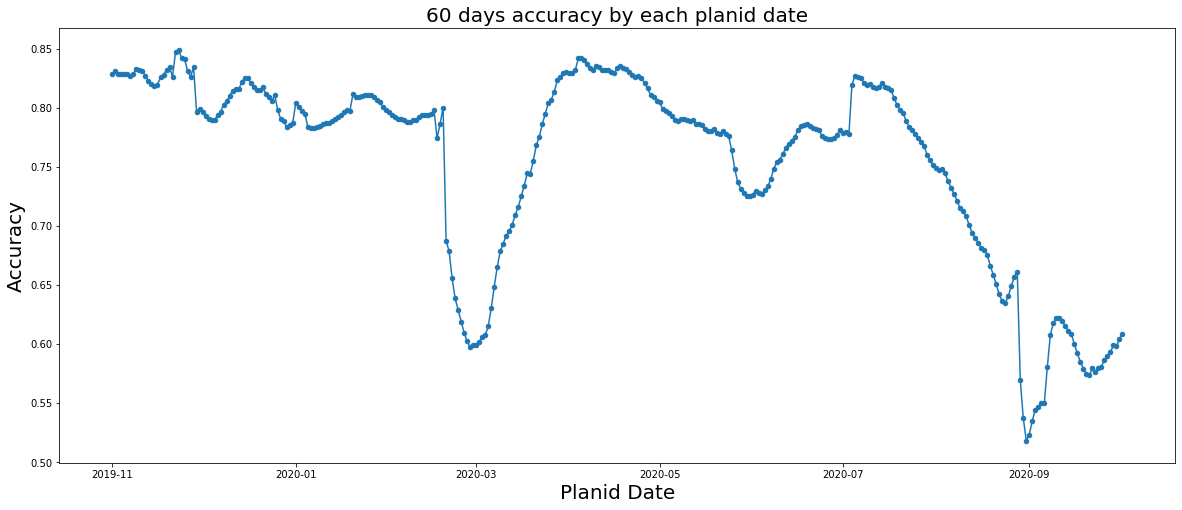

In [343]:
plt.plot(acc_df_by_planid['plan_dt'], acc_df_by_planid['acc_for_60_days'])
plt.scatter(acc_df_by_planid['plan_dt'], acc_df_by_planid['acc_for_60_days'], s = 20)
plt.xlabel('Planid Date', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.title('60 days accuracy by each planid date', fontsize = 20)
plt.show()

In [344]:
acc_df_by_planid.loc[acc_df_by_planid['acc_for_60_days'] <= 0.6]

,plan_dt,acc_for_60_days
119,2020-02-28,0.59725
120,2020-02-29,0.59882
121,2020-03-01,0.59938
302,2020-08-29,0.56955
303,2020-08-30,0.53723
304,2020-08-31,0.51810
305,2020-09-01,0.52327
306,2020-09-02,0.53520
307,2020-09-03,0.54446
308,2020-09-04,0.54661


In [345]:
eval_df_final.loc[eval_df_final['plan_dt'] == '2020-03-03']

,plan_dt,t_year_dt,pred_window,prediction,actual,accuracy
123,2020-03-03,2020-03-04,t+1,8076,8134,0.99287
460,2020-03-03,2020-03-05,t+2,9849,10131,0.97216
797,2020-03-03,2020-03-06,t+3,10316,6119,0.31410
1134,2020-03-03,2020-03-07,t+4,10285,5970,0.27722
1471,2020-03-03,2020-03-08,t+5,10117,5081,0.00886
...,...,...,...,...,...,...
28768,2020-03-03,2020-05-28,t+86,9315,8089,0.84844
29105,2020-03-03,2020-05-29,t+87,9361,8778,0.93358
29442,2020-03-03,2020-05-30,t+88,9296,7150,0.69986
29779,2020-03-03,2020-05-31,t+89,9200,6436,0.57054


## prediction with a rolling window

In [346]:
def accuracy_sumproduct(df, actual_col, acc_col):
    return sum(df[actual_col] * df[acc_col]) / sum(df[actual_col])

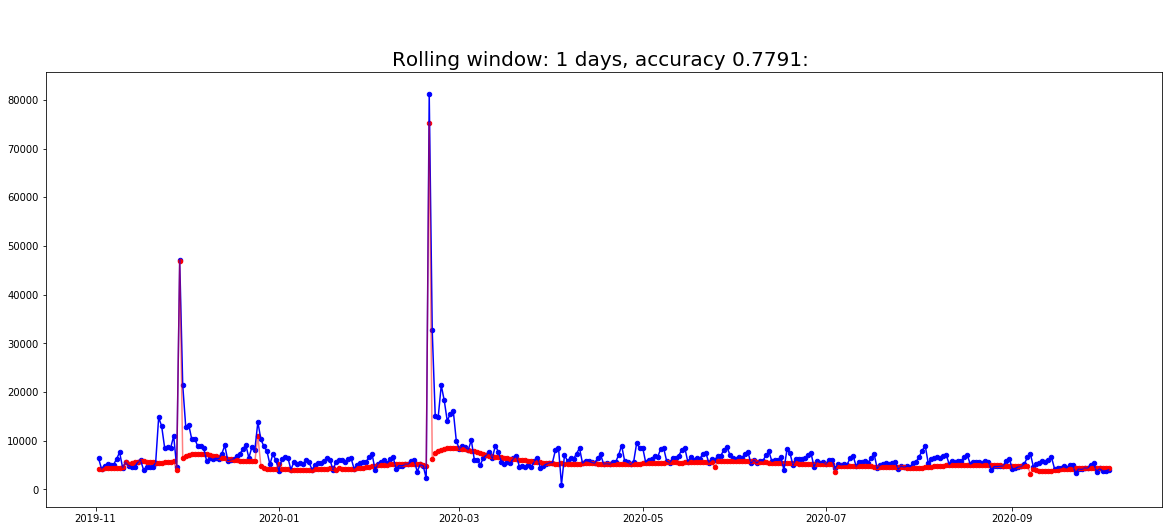

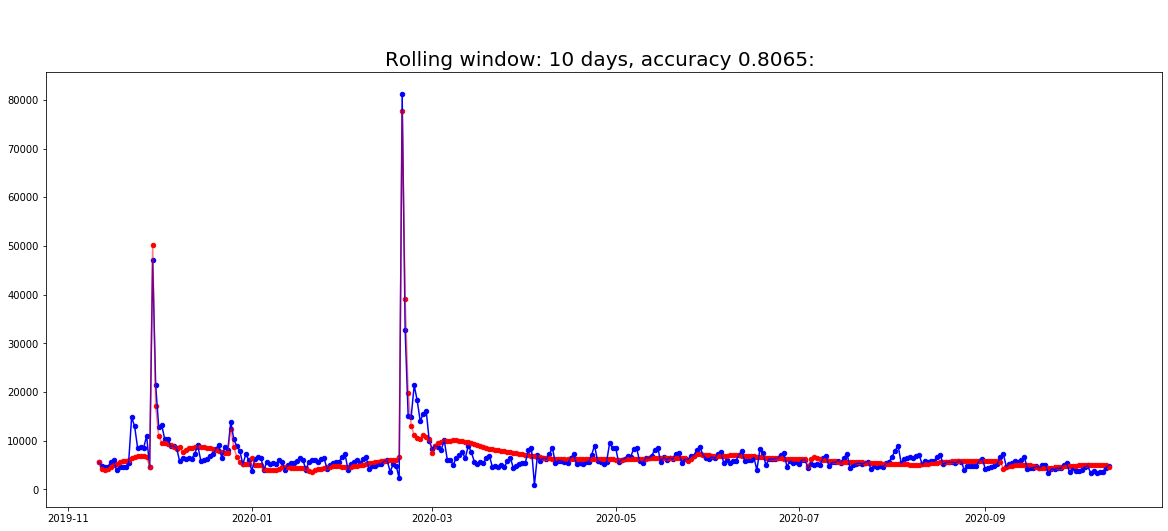

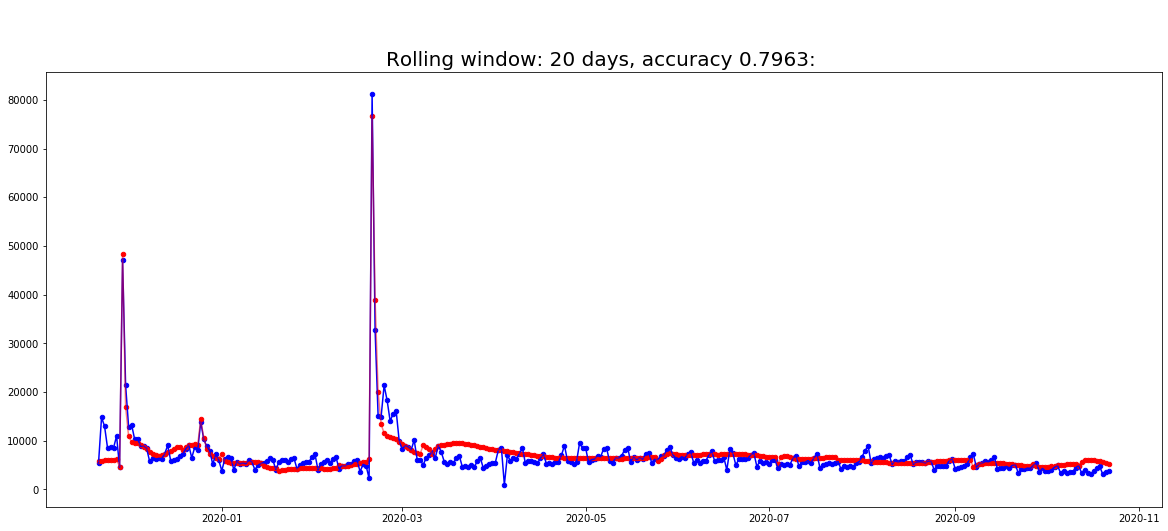

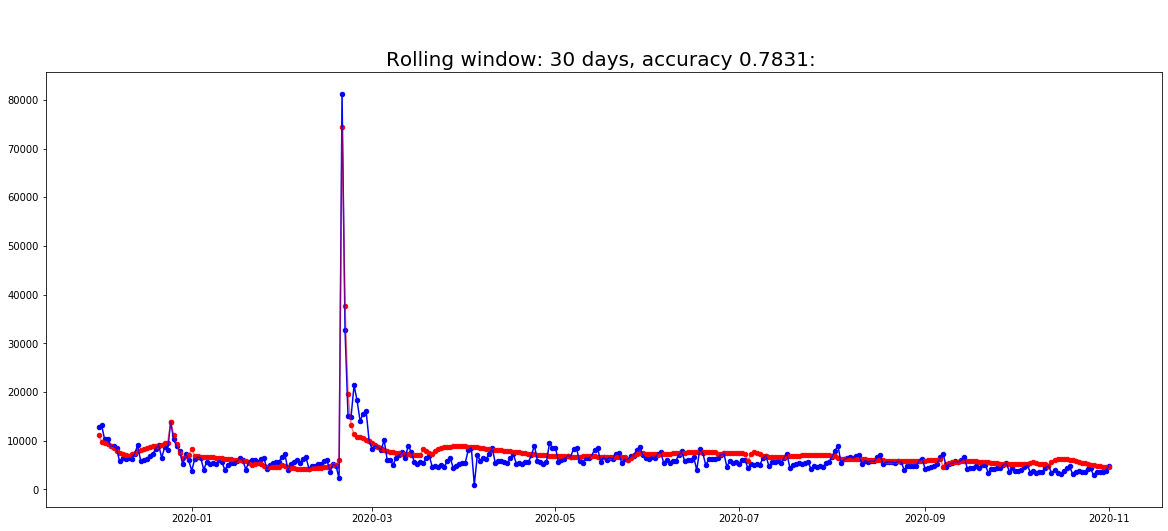

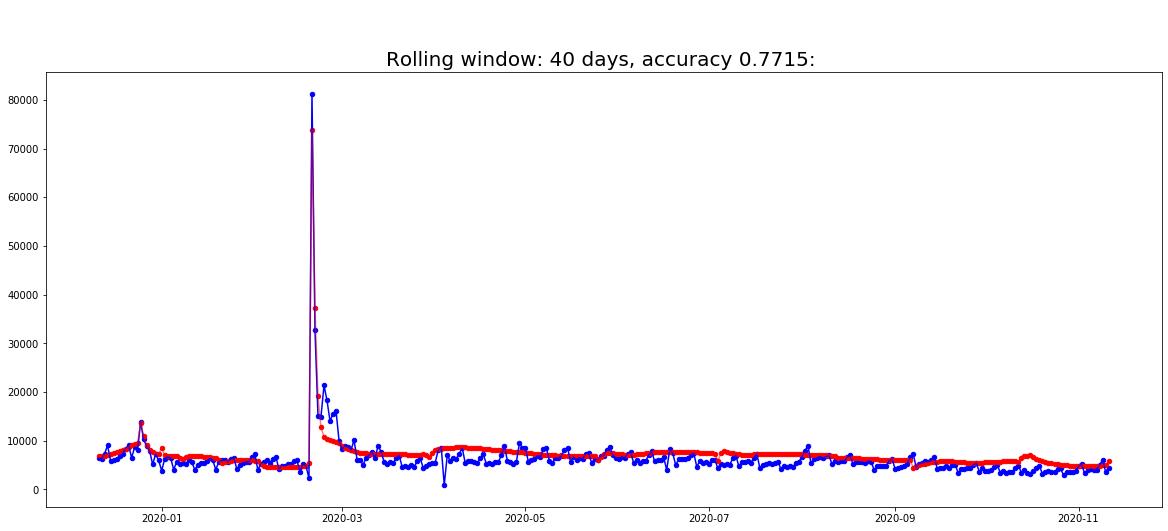

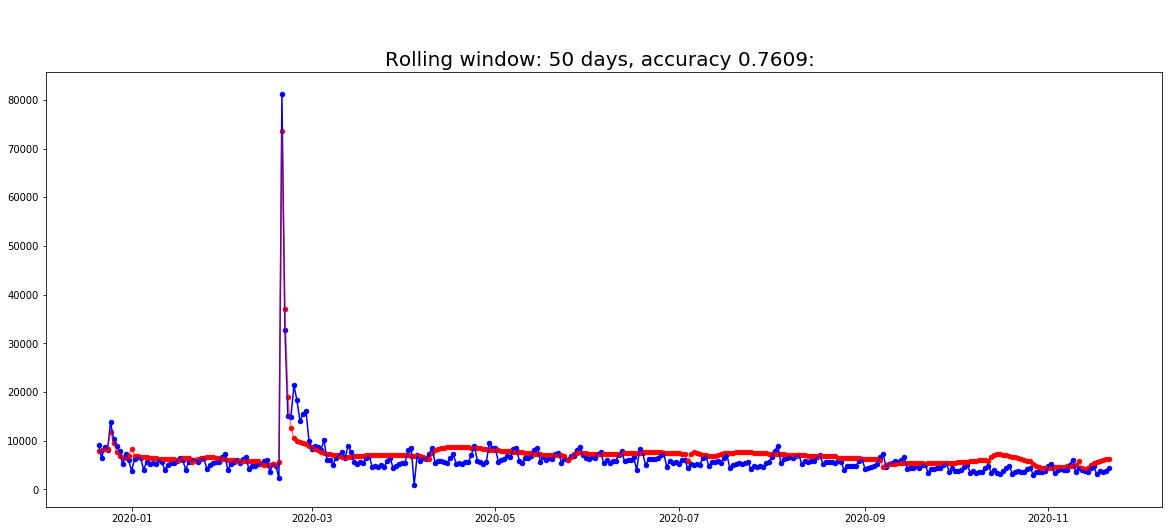

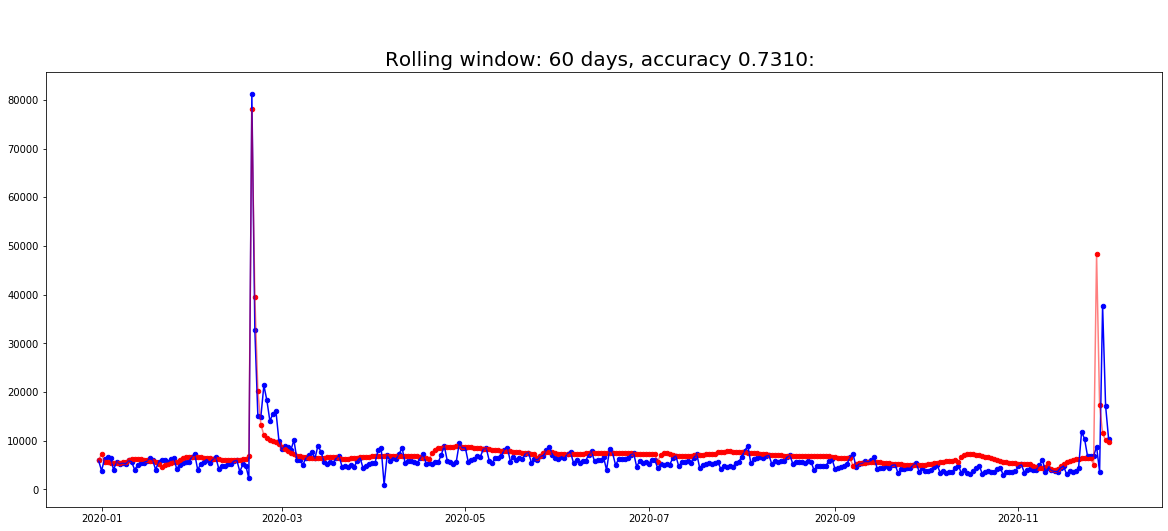

In [347]:
pred_window_selected = ['1', '10', '20', '30','40', '50', '60']

for pred_win in pred_window_selected:
    eval_df_selected_window = eval_df_final.loc[eval_df_final['pred_window'] == ('t+' + pred_win)]
    plt.title("\n\nRolling window: %s days, accuracy %0.4f: " %(pred_win, accuracy_sumproduct(eval_df_selected_window, 'actual', 'accuracy')), fontsize = 20)
    plt.plot(eval_df_selected_window['t_year_dt'] ,eval_df_selected_window['actual'], label = 'actual', c= 'blue')
    plt.scatter(eval_df_selected_window['t_year_dt'] , eval_df_selected_window['actual'], c = 'blue', s = 20)
    plt.plot(eval_df_selected_window['t_year_dt'] ,eval_df_selected_window['prediction'], alpha = 0.5, label = 'prediction', c= 'red')
    plt.scatter(eval_df_selected_window['t_year_dt'] , eval_df_selected_window['prediction'], c = 'red', s = 20)
    plt.show()